# Plot the lowpass filter

In [1]:

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import os

%matplotlib inline

In [2]:

class LowPassFilter(object):
    def __init__(self, tau, ts):
        self.a = 1. / (tau / ts + 1.)
        self.b = tau / ts / (tau / ts + 1.);

        self.last_val = 0.
        self.ready = False

    def get(self):
        return self.last_val

    def filt(self, val):
        if self.ready:
            val = self.a * val + self.b * self.last_val
        else:
            self.ready = True

        self.last_val = val
        return val


In [7]:
def plotlowpass(tau, ts):
    steer_lowpass = LowPassFilter(tau, ts)
    size = 20
    #x = np.linspace(1.0, 0.0, num=10)
    x1 = -np.random.random_sample(size)
    x2 = np.random.random_sample(size)
    x = np.concatenate((x1,x2))

    y = [steer_lowpass.filt(i) for i in x ]

    df = pd.DataFrame({'raw':x,'lowpass':y})
    df.plot(title='LowPassFilter({}, {})'.format(tau,ts))
    
    

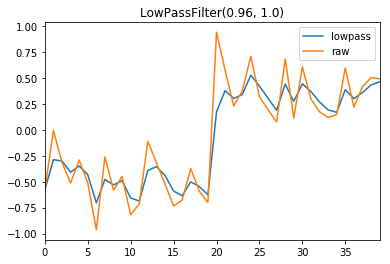

In [9]:
# parameters used in steering
plotlowpass(0.96, 1.)

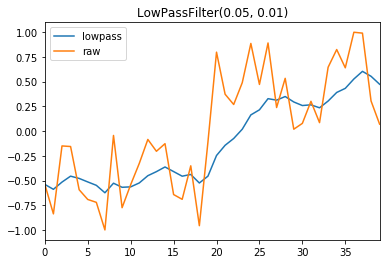

In [11]:
# parameters used in throttle and brake
plotlowpass(0.05, 0.01)